In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat('ex8_movies.mat')
Y = mat['Y']
R = mat['R']
Y.shape, R.shape

((1682, 943), (1682, 943))

In [3]:
print(f"Average Rating for Toy Story: {(np.sum(Y[0, :] * R[0, :]))/np.sum(R[0, :])}/5")

Average Rating for Toy Story: 3.8783185840707963/5


Text(0, 0.5, 'Movies')

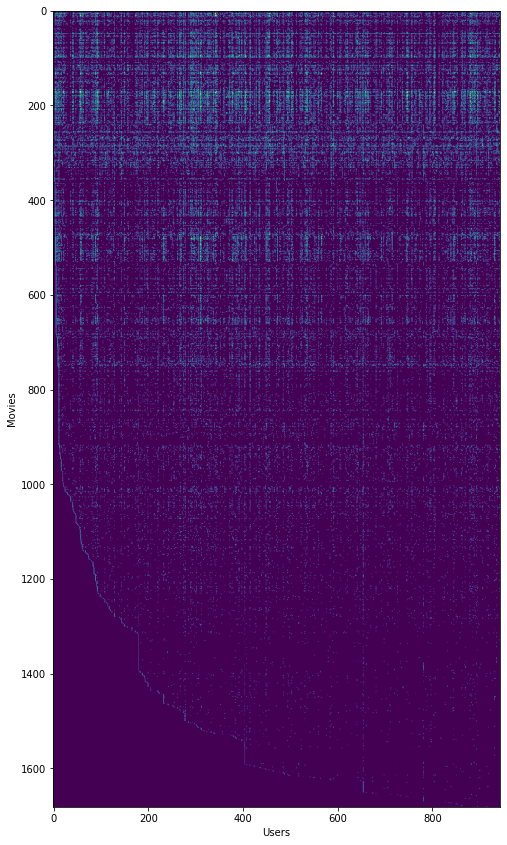

In [4]:
plt.figure(figsize=(8, 16))
plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Movies")

In [5]:
params = loadmat('ex8_movieParams.mat')
X = params['X']
Theta = params['Theta']
num_users = params['num_users']
num_movies = params['num_movies']
num_features = params['num_features']

**COLLABORATIVE FILTERING LEARNING ALGORITHM**

$J(x^{(i)},...,x^{(n_m)},\Theta^{(I)},...,\Theta^{(n_u)}) = \frac{1}{2} \sum ((\Theta^{(j)})^Tx^{(i)} - y^{(i,j)})^2 + (\frac{\lambda}{2} \sum^{n_u}_{j=1}\sum^n_{k=1} (\Theta^{(j)}_k)^2) + (\frac{\lambda}{2} \sum^{n_m}_{i=1}\sum^n_{k=1} (x^{(i)}_k)^2)$

$\frac{\partial J}{\partial x^{(i)}_k} = \sum ((\Theta^{(j)})^Tx^{(i)} - y^{(i,j)})\Theta_k^{(j)} +\lambda x^{(i)}_k$

$\frac{\partial J}{\partial \Theta^{(j)}_k} = \sum ((\Theta^{(j)})^Tx^{(i)} - y^{(i,j)})x_k^{(i)} +\lambda \Theta^{(j)}_k$


In [6]:
def costFunction(params, Y, R, num_users, num_movies, num_features, Lambda):
    X = params[:(num_movies * num_features)].reshape(num_movies, num_features)
    Theta = params[(num_movies * num_features):].reshape(num_users, num_features)
    
    h_theta = X @ Theta.T
    err = h_theta - Y
    error_factor = err * R
    
    J = 1/2 * np.sum(error_factor ** 2)
    X_grad = error_factor @ Theta
    Theta_grad = error_factor.T @ X
    grad = np.append(X_grad.flatten(), Theta_grad.flatten())
    
    J_reg = ((Lambda/2) * np.sum(Theta**2)) + ((Lambda/2) * np.sum(X**2))
    X_reg = (Lambda/2) * X
    Theta_reg = (Lambda/2) * Theta
    
    reg_J = J + J_reg
    reg_X_grad = X_grad + X_reg
    reg_Theta_grad = Theta_grad + Theta_reg
    
    reg_grad = np.append(reg_X_grad.flatten(), reg_Theta_grad.flatten())
    
    return J, grad, reg_J, reg_grad    

In [7]:
num_users, num_movies, num_features = 4, 5, 3
X_test = X[:num_movies, :num_features]
Theta_test = Theta[:num_users, :num_features]
Y_test = Y[:num_movies, :num_users]
R_test = R[:num_movies, :num_users]
params = np.append(X_test.flatten(), Theta_test.flatten())

J, grad = costFunction(params, Y_test, R_test, num_users, num_movies, num_features, 0)[:2]
print("Cost at loaded parameters:",J)
J2, grad2 = costFunction(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[2:]
print("Cost at loaded parameters (lambda = 1.5):",J2)

Cost at loaded parameters: 22.224603725685675
Cost at loaded parameters (lambda = 1.5): 31.34405624427422


In [8]:
movieList = open('movie_ids.txt', 'r').read().split('\n')[:-1]

movieList

['1 Toy Story (1995)',
 '2 GoldenEye (1995)',
 '3 Four Rooms (1995)',
 '4 Get Shorty (1995)',
 '5 Copycat (1995)',
 '6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 '7 Twelve Monkeys (1995)',
 '8 Babe (1995)',
 '9 Dead Man Walking (1995)',
 '10 Richard III (1995)',
 '11 Seven (Se7en) (1995)',
 '12 Usual Suspects, The (1995)',
 '13 Mighty Aphrodite (1995)',
 '14 Postino, Il (1994)',
 "15 Mr. Holland's Opus (1995)",
 '16 French Twist (Gazon maudit) (1995)',
 '17 From Dusk Till Dawn (1996)',
 '18 White Balloon, The (1995)',
 "19 Antonia's Line (1995)",
 '20 Angels and Insects (1995)',
 '21 Muppet Treasure Island (1996)',
 '22 Braveheart (1995)',
 '23 Taxi Driver (1976)',
 '24 Rumble in the Bronx (1995)',
 '25 Birdcage, The (1996)',
 '26 Brothers McMullen, The (1995)',
 '27 Bad Boys (1995)',
 '28 Apollo 13 (1995)',
 '29 Batman Forever (1995)',
 '30 Belle de jour (1967)',
 '31 Crimson Tide (1995)',
 '32 Crumb (1994)',
 '33 Desperado (1995)',
 '34 Doom Generation, The (1995)',
 '35

In [9]:
my_ratings = np.zeros((1682,1))

my_ratings[0] = 4 
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5
print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for index",movieList[i])

New user ratings:

Rated 4 for index 1 Toy Story (1995)
Rated 3 for index 7 Twelve Monkeys (1995)
Rated 5 for index 12 Usual Suspects, The (1995)
Rated 4 for index 54 Outbreak (1995)
Rated 5 for index 64 Shawshank Redemption, The (1994)
Rated 3 for index 66 While You Were Sleeping (1995)
Rated 5 for index 69 Forrest Gump (1994)
Rated 4 for index 83 Much Ado About Nothing (1993)
Rated 2 for index 98 Silence of the Lambs, The (1991)
Rated 5 for index 226 Die Hard 2 (1990)
Rated 5 for index 355 Sphere (1998)


**RECOMMENDATIONS**

**NORAMLIZATION**

In [10]:
def normalizeRatings(Y, R):
    m, n = Y.shape
    Y_mean = np.zeros((m, 1))
    Y_norm = np.zeros((Y.shape))
    
    for i in range(m):
        idx = R[i, :]==1
        Y_mean[i] = np.sum(Y[i, :])/np.count_nonzero(R[i, :])
        Y_norm[i, idx] = Y[i, idx] - Y_mean[i]
        
    return Y_norm, Y_mean

**GRADIENT DESCENT**

In [11]:
def gradientDescent(initial_parameters, Y, R, num_users, num_movies, num_features, alpha, num_iters, Lambda):
    
    X = initial_parameters[:(num_movies*num_features)].reshape(num_movies, num_features)
    Theta = initial_parameters[(num_movies*num_features):].reshape(num_users, num_features)
    
    J_history = []
    
    for i in range(num_iters):       
        params = np.append(X.flatten(), Theta.flatten())
        
        cost, grad = costFunction(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        X_grad = grad[:(num_movies*num_features)].reshape(num_movies, num_features)
        Theta_grad = grad[(num_movies*num_features):].reshape(num_users, num_features)
        
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        
        J_history.append(cost)
        paramsFinal = np.append(X.flatten(), Theta.flatten())
        
    return paramsFinal, J_history   

In [12]:
Y = np.hstack((my_ratings,Y))
R = np.hstack((my_ratings!=0,R))

Ynorm, Ymean = normalizeRatings(Y, R)

num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10

paramsFinal, J_history = gradientDescent(initial_parameters, Y, R, num_users, num_movies, num_features, 0.001, 400, Lambda)

Text(0.5, 1.0, 'Cost function using Gradient Descent')

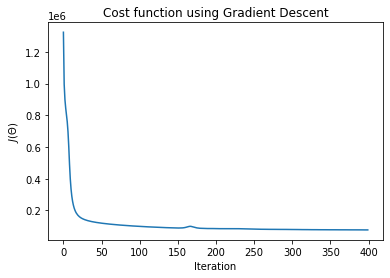

In [13]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

**PREDICTIONS**

In [14]:
X = paramsFinal[:(num_movies*num_features)].reshape(num_movies, num_features)
Theta = paramsFinal[(num_movies*num_features):].reshape(num_users, num_features)

p = X @ Theta.T
predictions = p[:, 0].reshape(-1, 1) + Ymean

df = pd.DataFrame(np.column_stack((predictions, np.array(movieList).reshape(-1, 1))))

df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)

print("Top recommendations for you:\n")
for i in range(10):
    print("Predicting rating",round(float(df[0][i]),1)," for index",df[1][i])

Top recommendations for you:

Predicting rating 8.9  for index 64 Shawshank Redemption, The (1994)
Predicting rating 8.8  for index 318 Schindler's List (1993)
Predicting rating 8.6  for index 313 Titanic (1997)
Predicting rating 8.5  for index 22 Braveheart (1995)
Predicting rating 8.5  for index 174 Raiders of the Lost Ark (1981)
Predicting rating 8.4  for index 12 Usual Suspects, The (1995)
Predicting rating 8.2  for index 96 Terminator 2: Judgment Day (1991)
Predicting rating 8.2  for index 169 Wrong Trousers, The (1993)
Predicting rating 8.2  for index 114 Wallace & Gromit: The Best of Aardman Animation (1996)
Predicting rating 8.2  for index 272 Good Will Hunting (1997)
